In [1]:
import pandas as pd
import numpy as np

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn import tree, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [10]:
iris = load_iris() # Load Data

df = pd.DataFrame(iris.data, columns = iris.feature_names) # Create a dataframe
df['target'] = iris.target
df['target name'] = df['target'].apply(lambda x: 'sentosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [12]:
n_labels = len(set(df['target']))
print(f'Number of labels: {n_labels}')
print(f"labels: {set(df['target name'])}")

Number of labels: 3
labels: {'virginica', 'versicolor', 'sentosa'}


In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
nan_count = df.isna().sum()
print(nan_count )

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target name          0
dtype: int64


In [22]:
y = df.target
y_names = df["target name"]
#### START CODE HERE ####
#### Approximately 1 line ####
X_2d = df.iloc[:, :2]
#### END CODE HERE ####

In [23]:
X_2d.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [24]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [27]:
y_names

0        sentosa
1        sentosa
2        sentosa
3        sentosa
4        sentosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target name, Length: 150, dtype: object

In [28]:
### EJERCICIO 2.2 ####

In [29]:
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, shuffle=True, random_state=42)

In [30]:
print(f"{len(X_train_2d)} training examples")
print(f"{len(X_test_2d)} test examples")

120 training examples
30 test examples


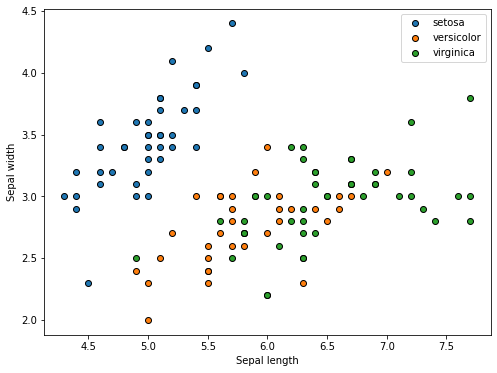

In [51]:
labels = iris.target_names
plt.figure(2, figsize=(8, 6))
plt.clf()

for label_id, label in enumerate(labels):
    X_temp = X_train_2d.loc[y_train == label_id]
    plt.scatter(X_temp.iloc[:, 0], X_temp.iloc[:, 1], cmap=plt.cm.Set1, edgecolor="k", label=label)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xticks()
plt.yticks()
plt.legend() 

In [54]:
### EJERCICIO 2.3 ####

In [53]:
svm_model = SVC(gamma=0.1, kernel="rbf", probability=True)

In [63]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo SVM con los parámetros especificados
svm_model = SVC(gamma=0.1, kernel="rbf", probability=True)

# Entrenar el modelo con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_test_pred = svm_model.predict(X_test)

# Probabilidades de las predicciones (si probability=True)
y_test_probs = svm_model.predict_proba(X_test)

# Ahora puedes evaluar el rendimiento del modelo utilizando las métricas y visualizaciones mencionadas anteriormente.

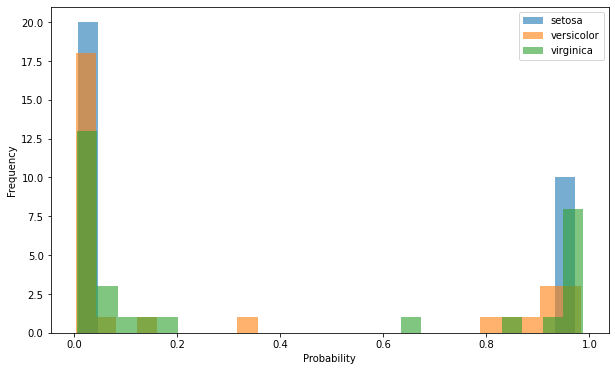

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for class_idx, class_name in enumerate(iris.target_names):
    plt.hist(y_test_probs[:, class_idx], bins=25, label=class_name, alpha=0.6)

plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()

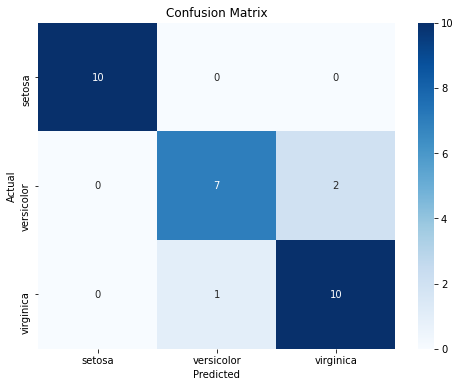

In [65]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [56]:
### EJERCICIO 2.4 ####

In [57]:
svm_model.fit(X_train_2d, y_train)

SVC(gamma=0.1, probability=True)

In [58]:
### EJERCICIO 2.5 ####

In [59]:
y_test_pred_svm = svm_model.predict(X_test_2d)

In [61]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_pred_svm)
print(conf_matrix)

[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


In [62]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred_svm)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9


In [66]:
### EJERCICIO 2.6 ####

In [67]:
cm = confusion_matrix(y_test, y_test_pred_svm)

In [69]:
print(cm)

[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


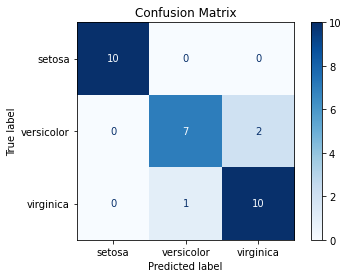

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svm, cmap=plt.cm.Blues)
ax = cmd.ax_
ax.set_title('Confusion Matrix')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

In [71]:
### EJERCICIO 2.7 ####

In [72]:
acc_svm = accuracy_score(y_test, y_test_pred_svm)
f1_svm = f1_score(y_test, y_test_pred_svm, average='macro')
\

In [73]:
print(f"Accuracy: {acc_svm:.2}")
print(f"F1: {f1_svm:.2}")

Accuracy: 0.9
F1: 0.9


In [77]:
### EJERCICIO ARBOL  2.6 ####

In [74]:
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train_2d, y_train)
y_test_pred_dt = dt_model.predict(X_test_2d)

In [75]:
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)
print("Matriz de Confusión:")
print(conf_matrix_dt)

Matriz de Confusión:
[[ 9  1  0]
 [ 0  6  3]
 [ 0  1 10]]


In [76]:
classification_report_dt = classification_report(y_test, y_test_pred_dt)
print("Informe de Clasificación:")
print(classification_report_dt)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.75      0.67      0.71         9
           2       0.77      0.91      0.83        11

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



In [78]:
### EJERCICIO KNEAREST  2.7 ####

In [79]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_2d, y_train)
y_test_pred_knn = knn_model.predict(X_test_2d)

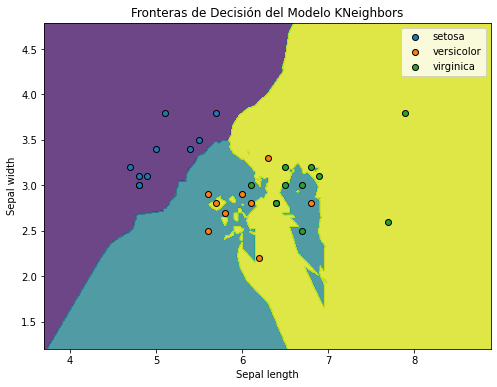

In [80]:
plt.figure(figsize=(8, 6))
plt.clf()

# Crear una malla para visualizar las fronteras de decisión
xx, yy = np.meshgrid(np.arange(X_test_2d.iloc[:, 0].min() - 1, X_test_2d.iloc[:, 0].max() + 1, 0.01),
                     np.arange(X_test_2d.iloc[:, 1].min() - 1, X_test_2d.iloc[:, 1].max() + 1, 0.01))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)

# Scatter plot de los puntos de prueba con sus etiquetas
for label_id, label in enumerate(labels):
    X_temp = X_test_2d.loc[y_test == label_id]
    plt.scatter(X_temp.iloc[:, 0], X_temp.iloc[:, 1], cmap=plt.cm.Set1, edgecolor="k", label=label)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Fronteras de Decisión del Modelo KNeighbors")
plt.xticks()
plt.yticks()
plt.legend()
plt.show()


In [85]:
### EJERCICIO  2.8 ####

In [84]:
rf_model = RandomForestClassifier(max_depth=2)
rf_model.fit(X_train_2d, y_train)
y_test_pred_rf = rf_model.predict(X_test_2d)

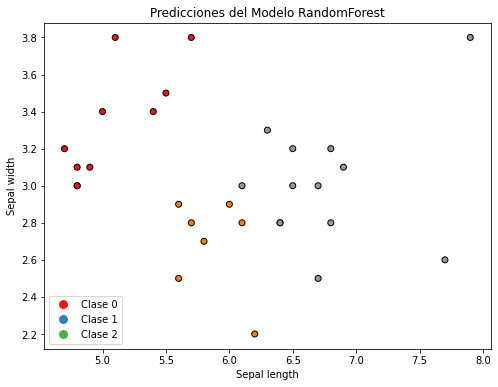

In [87]:
import matplotlib.pyplot as plt

# Crear una figura y limpiar el plot
plt.figure(figsize=(8, 6))
plt.clf()

# Crear un scatter plot para los puntos de prueba
plt.scatter(X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1], c=y_test_pred_rf, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Predicciones del Modelo RandomForest")
plt.xticks()
plt.yticks()

# Crear una leyenda para los colores de las clases
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) for c in plt.cm.Set1.colors]
labels = [f'Clase {label}' for label in np.unique(y_test_pred_rf)]
plt.legend(handles, labels)

plt.show()

NameError: name 'DecisionBoundaryDisplay' is not defined

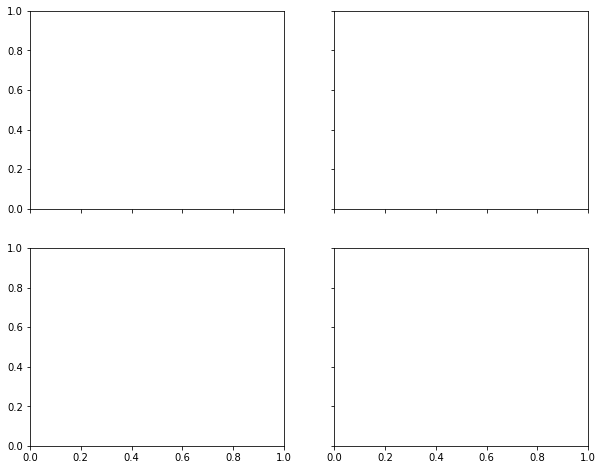

In [99]:
# Plotting decision regions
from itertools import product

f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [svm_model, dt_model, knn_model, rf_model],
                        ["SVM", "Decision Tree", "KNN", "Random Forest"]):
    DecisionBoundaryDisplay.from_estimator(
        clf, X_train_2d, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict")
    axarr[idx[0], idx[1]].scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [88]:
### EJERCICIO  2.9 ####

In [102]:
print(labels)

['Clase 0', 'Clase 1', 'Clase 2']


In [103]:
classification_report_svm = classification_report(y_test, y_test_pred_svm, target_names=labels)
classification_report_dt = classification_report(y_test, y_test_pred_dt, target_names=labels)
classification_report_knn = classification_report(y_test, y_test_pred_knn, target_names=labels)
classification_report_rf = classification_report(y_test, y_test_pred_rf, target_names=labels)


In [104]:
print("SVM")
print(classification_report_svm)

print("\n\nDecision Tree")
print(classification_report_dt)

print("\n\nKNN")
print(classification_report_knn)

print("\n\nRandom Forest")
print(classification_report_rf)

SVM
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00        10
     Clase 1       0.88      0.78      0.82         9
     Clase 2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



Decision Tree
              precision    recall  f1-score   support

     Clase 0       1.00      0.90      0.95        10
     Clase 1       0.75      0.67      0.71         9
     Clase 2       0.77      0.91      0.83        11

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



KNN
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00        10
     Clase 1       0.64      0.78      0.70         9
     Clase 2       0.78      0.64      0.70      

In [105]:
### EJERCICIO  3.1 ####

In [106]:
y = df.target
y_names = df["target name"]

X = df.iloc[:, :4] 
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print(f"Number of training examples {len(X_train)}")
print(f"Number of test examples {len(X_test)}")


Number of training examples 120
Number of test examples 30


In [108]:
### EJERCICIO  3.2 Puede superar al mejor modelo obtenido utilizando solo 2 funciones de entrada?
####

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear instancias de diferentes modelos
svm_model = SVC()
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()

# Entrenar los modelos en los datos de entrenamiento
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_test_pred_svm = svm_model.predict(X_test)
y_test_pred_dt = dt_model.predict(X_test)
y_test_pred_knn = knn_model.predict(X_test)
y_test_pred_rf = rf_model.predict(X_test)

# Calcular métricas de evaluación para cada modelo
classification_report_svm = classification_report(y_test, y_test_pred_svm, target_names=labels)
classification_report_dt = classification_report(y_test, y_test_pred_dt, target_names=labels)
classification_report_knn = classification_report(y_test, y_test_pred_knn, target_names=labels)
classification_report_rf = classification_report(y_test, y_test_pred_rf, target_names=labels)

# Imprimir los informes de clasificación para cada modelo
print("SVM")
print(classification_report_svm)

print("\n\nDecision Tree")
print(classification_report_dt)

print("\n\nKNN")
print(classification_report_knn)

print("\n\nRandom Forest")
print(classification_report_rf)

SVM
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00        19
     Clase 1       1.00      1.00      1.00        13
     Clase 2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Decision Tree
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00        19
     Clase 1       1.00      1.00      1.00        13
     Clase 2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



KNN
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00        19
     Clase 1       1.00      1.00      1.00        13
     Clase 2       1.00      1.00      1.00      